In [1]:
!pip install opencv-python-headless numpy scikit-learn

In [6]:
import zipfile

# Upload the zip file using Jupyter Notebook interface

# Extract the zip file
with zipfile.ZipFile('celeba.zip', 'r') as zip_ref:
    zip_ref.extractall('./celeba')


In [8]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import os

def extract_skin_tone(image_path, k=1):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image.reshape(-1, 3)
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    
    dominant_color = kmeans.cluster_centers_[0]
    return dominant_color / 255.0

celebA_path = './celeba'
skin_tones = []

for image_file in os.listdir(celebA_path):
    image_path = os.path.join(celebA_path, image_file)
    dominant_color = extract_skin_tone(image_path)
    skin_tones.append(dominant_color)

# Save skin tones to a CSV file or use directly in dataset
import pandas as pd

df = pd.DataFrame(skin_tones, columns=['R', 'G', 'B'])
df.to_csv('skin_tones.csv', index=False)


Major Skin Tones (RGB):
[[199 181 170]
 [ 93  70  57]
 [137 113 100]
 [ 66  51  43]
 [123 118 128]
 [153 135 123]
 [170 156 151]
 [105  90  82]
 [186 150 120]
 [130  86  65]]


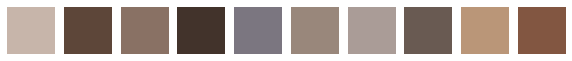

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

skin_tones_df = pd.read_csv('./skin_tones.csv')  

# Convert the skin tones to numpy array
skin_tones_np = skin_tones_df[['R', 'G', 'B']].values

# Normalize the skin tones
normalized_skin_tones = skin_tones_np

# Perform K-Means clustering to find major skin tone clusters
kmeans = KMeans(n_clusters=10, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(normalized_skin_tones)

# Get the cluster centers (major skin tones)
major_skin_tones = kmeans.cluster_centers_

# Convert back to RGB scale
major_skin_tones_rgb = (major_skin_tones * 255).astype(int)

# Display the major skin tones
print("Major Skin Tones (RGB):")
print(major_skin_tones_rgb)

# Plot the major skin tones
plt.figure(figsize=(10, 2))
for i, color in enumerate(major_skin_tones_rgb):
    plt.subplot(1, 10, i + 1)
    plt.imshow([[color / 255.0]])
    plt.axis('off')
plt.show()


In [5]:
def complementary_color(rgb_color):
    return [255 - rgb_color[0], 255 - rgb_color[1], 255 - rgb_color[2]]

def analogous_colors(rgb_color):
    # Shift by +/-30 degrees in HSV space for simplicity
    hsv = cv2.cvtColor(np.uint8([[rgb_color]]), cv2.COLOR_RGB2HSV)[0][0]
    analogous1 = (hsv[0] + 30) % 180, hsv[1], hsv[2]
    analogous2 = (hsv[0] - 30) % 180, hsv[1], hsv[2]
    return [cv2.cvtColor(np.uint8([[analogous1]]), cv2.COLOR_HSV2RGB)[0][0],
            cv2.cvtColor(np.uint8([[analogous2]]), cv2.COLOR_HSV2RGB)[0][0]]

def triadic_colors(rgb_color):
    # Shift by 120 degrees in HSV space
    hsv = cv2.cvtColor(np.uint8([[rgb_color]]), cv2.COLOR_RGB2HSV)[0][0]
    triadic1 = (hsv[0] + 60) % 180, hsv[1], hsv[2]
    triadic2 = (hsv[0] + 120) % 180, hsv[1], hsv[2]
    return [cv2.cvtColor(np.uint8([[triadic1]]), cv2.COLOR_HSV2RGB)[0][0],
            cv2.cvtColor(np.uint8([[triadic2]]), cv2.COLOR_HSV2RGB)[0][0]]


In [7]:
import cv2
import numpy as np
import pandas as pd

# Load the colors dataset
colors_df = pd.read_csv('./colors.csv')  # Replace with actual path
skin_tones_df = pd.read_csv('./skin_tones.csv')  # Replace with actual path

# Convert the skin tones to numpy array
skin_tones_np = skin_tones_df[['R', 'G', 'B']].values

# Normalize RGB values
def normalize_rgb(r, g, b):
    return r / 255.0, g / 255.0, b / 255.0

data = []
labels = []

for skin_tone in skin_tones_np:
    comp_color = complementary_color(skin_tone)
    analogous_colors_list = analogous_colors(skin_tone)
    triadic_colors_list = triadic_colors(skin_tone)
    for _, row in colors_df.iterrows():
        color_rgb = (row['R'], row['G'], row['B'])
        normalized_color_rgb = normalize_rgb(*color_rgb)
        # Convert to numpy arrays for comparison
        color_rgb_np = np.array(color_rgb)
        comp_color_np = np.array(comp_color)
        analogous_colors_np = [np.array(color) for color in analogous_colors_list]
        triadic_colors_np = [np.array(color) for color in triadic_colors_list]
        
        # Check if color_rgb_np matches any of the color harmony arrays
        if (np.array_equal(color_rgb_np, comp_color_np) or
            any(np.array_equal(color_rgb_np, color) for color in analogous_colors_np) or
            any(np.array_equal(color_rgb_np, color) for color in triadic_colors_np)):
            labels.append(1)
        else:
            labels.append(0)
        data.append(list(skin_tone) + list(color_rgb))

# Convert to DataFrame
data_df = pd.DataFrame(data, columns=['Skin_R', 'Skin_G', 'Skin_B', 'Color_R', 'Color_G', 'Color_B'])
labels_df = pd.DataFrame(labels, columns=['Label'])

# Combine data and labels
dataset = pd.concat([data_df, labels_df], axis=1)


In [9]:
# Filter the rows where the label is 1
suitable_colors_df = dataset[dataset['Label'] == 1]

# Print the filtered rows
print(suitable_colors_df)


          Skin_R    Skin_G    Skin_B  Color_R  Color_G  Color_B  Label
53      0.709914  0.537462  0.430295        0        0        0      1
918     0.516219  0.442556  0.421383        0        0        0      1
1783    0.577920  0.527974  0.496466        0        0        0      1
2648    0.351573  0.258238  0.196637        0        0        0      1
3513    0.638500  0.627608  0.594858        0        0        0      1
...          ...       ...       ...      ...      ...      ...    ...
272528  0.463359  0.428748  0.443282        0        0        0      1
273393  0.561008  0.448272  0.382845        0        0        0      1
274258  0.416591  0.339121  0.301862        0        0        0      1
275123  0.628723  0.530662  0.451749        0        0        0      1
275988  0.441950  0.331115  0.238390        0        0        0      1

[320 rows x 7 columns]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_df, labels_df, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train.values.ravel())

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 1.0


In [18]:
def recommend_colors(skin_tone, model, colors_df):
    recommendations = []
    count=0
    for _, row in colors_df.iterrows():
        color_rgb = (row['R'], row['G'], row['B'])
        normalized_color_rgb = normalize_rgb(*color_rgb)
        features = np.array([list(skin_tone) + list(normalized_color_rgb)])
        if model.predict(features)[0] == 1:
            recommendations.append(row['Color_Name'])
            count=count+1
    print(count)
    return recommendations

# Example usage
example_skin_tone = (24, 172, 105)  # Replace with actual skin tone
recommended_colors = recommend_colors(example_skin_tone, model, colors_df)
print(f"Recommended colors for skin tone {example_skin_tone}: {recommended_colors}")

545
Recommended colors for skin tone (24, 172, 105): ['Air Force Blue (Raf)', 'Air Force Blue (Usaf)', 'Air Superiority Blue', 'Alabama Crimson', 'Alizarin Crimson', 'Alloy Orange', 'Amaranth', 'Amber (Sae/Ece)', 'American Rose', 'Amethyst', 'Antique Fuchsia', 'Antique Ruby', 'Ao (English)', 'Aqua', 'Aquamarine', 'Army Green', 'Arsenic', 'Auburn', 'Aurometalsaurus', 'Avocado', 'Azure', 'Ball Blue', 'Barn Red', 'Bazaar', 'Big Dip O’Ruby', 'Bistre', 'Bittersweet', 'Bittersweet Shimmer', 'Black', 'Black Bean', 'Black Leather Jacket', 'Black Olive', 'Blast-Off Bronze', 'Bleu De France', 'Blue', 'Blue (Crayola)', 'Blue Gray', 'Blue-Green', 'Blue (Munsell)', 'Blue (Ncs)', 'Blue (Pigment)', 'Blue (Ryb)', 'Blue Sapphire', 'Blue-Violet', 'Blush', 'Bole', 'Bondi Blue', 'Boston University Red', 'Bottle Green', 'Boysenberry', 'Brandeis Blue', 'Brick Red', 'Bright Cerulean', 'Bright Green', 'Bright Maroon', 'Bright Pink', 'Bright Turquoise', 'Brilliant Rose', 'Brink Pink', 'British Racing Green', '

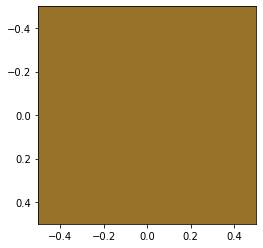

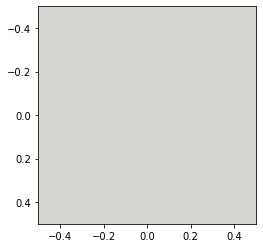

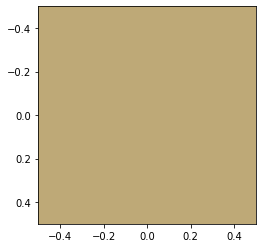

In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def extract_dominant_colors(image, k=3):
    """Extract dominant colors from an image using K-means clustering."""
    pixels = np.float32(image.reshape(-1, 3))
    kmeans = KMeans(n_clusters=k).fit(pixels)
    centers = kmeans.cluster_centers_
    return centers

def apply_color_harmony(base_color, harmony_type='complementary'):
    """Apply color harmony rules to generate a set of harmonious colors."""
    base_color = np.array(base_color) / 255.0
    harmonious_colors = []
    
    if harmony_type == 'analogous':
        for i in [-1, 1]:
            harmonious_colors.append(np.clip(base_color + i * 0.1, 0, 1) * 255)
    
    elif harmony_type == 'complementary':
        harmonious_colors.append((1 - base_color) * 255)
    
    elif harmony_type == 'triadic':
        harmonious_colors.append(np.roll(base_color, 1) * 255)
        harmonious_colors.append(np.roll(base_color, -1) * 255)
    
    elif harmony_type == 'split-complementary':
        harmonious_colors.append(np.clip((1 - base_color) + 0.1, 0, 1) * 255)
        harmonious_colors.append(np.clip((1 - base_color) - 0.1, 0, 1) * 255)
    
    elif harmony_type == 'tetradic':
        harmonious_colors.append(np.roll(base_color, 1) * 255)
        harmonious_colors.append((1 - base_color) * 255)
        harmonious_colors.append(np.roll(base_color, -1) * 255)
    
    elif harmony_type == 'monochromatic':
        for i in [0.1, 0.2, 0.3]:
            harmonious_colors.append(np.clip(base_color * (1 + i), 0, 1) * 255)
    
    return np.array(harmonious_colors, dtype=np.uint8)

# Example usage
image = cv2.imread('./try.webp')
dominant_colors = extract_dominant_colors(image)

for color in dominant_colors:
    harmonious_colors = apply_color_harmony(color, 'complementary')
    plt.figure()
    plt.imshow([harmonious_colors])
    plt.show()
